<a href="https://colab.research.google.com/github/Vaaya1176/Shivaaya_Projects/blob/main/ToyotaCorolla_Shivaaya_Pangasa_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 37 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Automatic         1436 non-null   int64 
 11  cc                1436 non-null   int64 
 12  Doors             1436 non-null   int64 
 13  Cylinders         1436 non-null   int64 
 14  Gears             1436 non-null   int64 
 15  Quarterly_Tax     1436 non-null   int64 
 16  Weight            1436 non-null   int64 
 17  

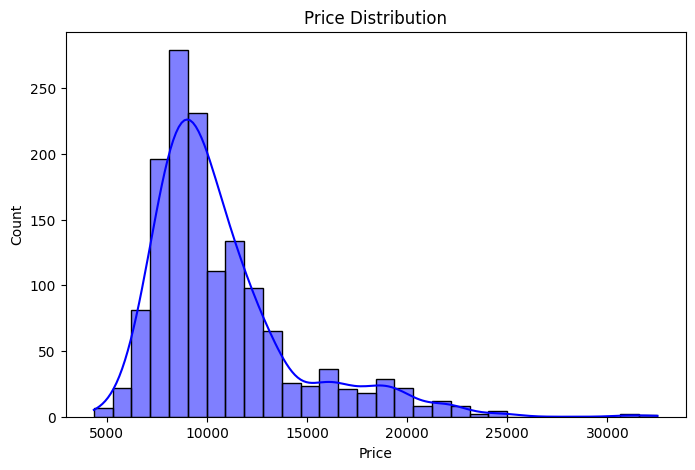

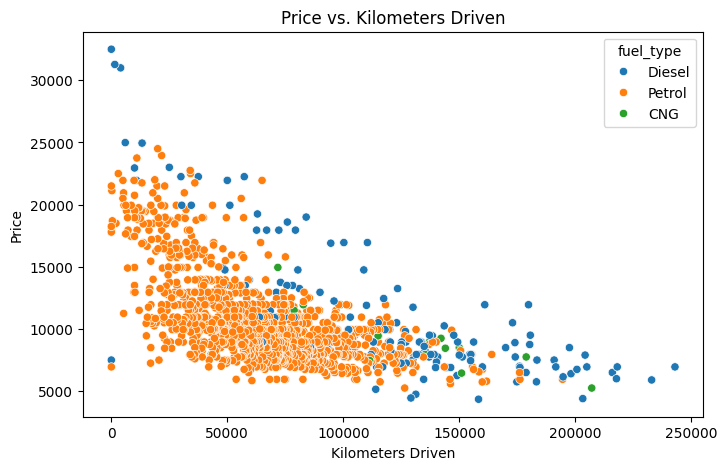

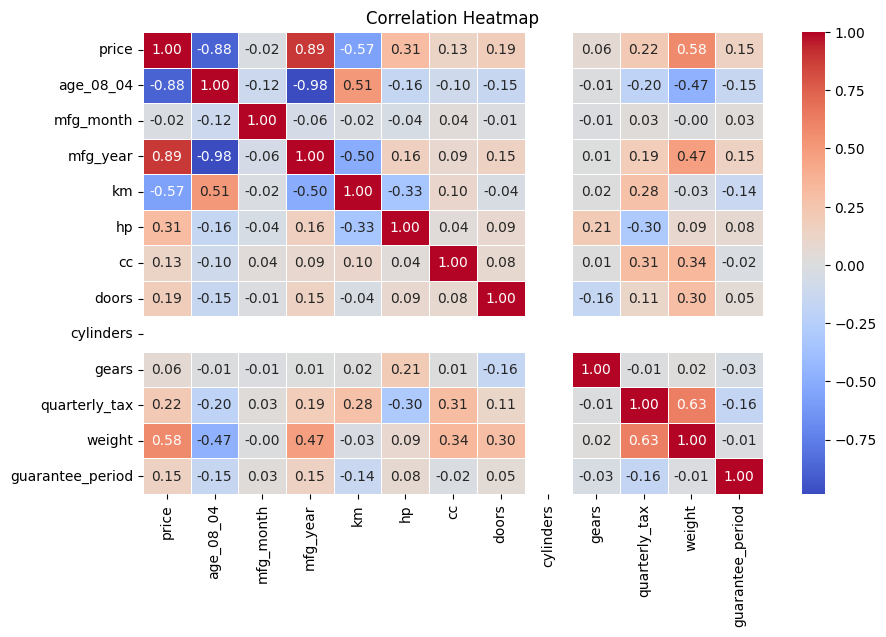


Correlation of price with other numerical variables:
price               1.000000
mfg_year            0.885159
weight              0.581198
hp                  0.314990
quarterly_tax       0.219197
doors               0.185326
guarantee_period    0.146627
cc                  0.126389
gears               0.063104
mfg_month          -0.018138
km                 -0.569960
age_08_04          -0.876590
cylinders                NaN
Name: price, dtype: float64


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the dataset
df = pd.read_csv("/content/archive (3).zip")

print("Dataset Info:")
df.info()
print("\nFirst 5 Rows:")
print(df.head())

# Converting column names to lowercase and replace spaces with underscores
df.columns = df.columns.str.lower().str.replace(' ', '_')

# Standardizing text formatting in categorical columns
df['model'] = df['model'].str.upper().str.strip()

def binary_to_boolean(column):
    return column.map({0: False, 1: True})

# Converting binary columns to boolean
binary_cols = ['met_color', 'automatic', 'mfr_guarantee', 'bovag_guarantee', 'abs',
               'airbag_1', 'airbag_2', 'airco', 'automatic_airco', 'boardcomputer',
               'cd_player', 'central_lock', 'powered_windows', 'power_steering',
               'radio', 'mistlamps', 'sport_model', 'backseat_divider',
               'metallic_rim', 'radio_cassette', 'tow_bar']

# Checking which columns are actually present
existing_binary_cols = [col for col in binary_cols if col in df.columns]
missing_cols = [col for col in binary_cols if col not in df.columns]
print("Missing columns:", missing_cols)

for col in existing_binary_cols:
    df[col] = binary_to_boolean(df[col])

# Droping unnecessary columns (e.g., 'id' since it's just an index)
df.drop(columns=['id'], inplace=True, errors='ignore')

# Step 3: Exploratory Data Analysis
# Summarising the statistics
print("\nSummary Statistics:")
print(df.describe())

# Visualizations
plt.figure(figsize=(8, 5))
sns.histplot(df['price'], bins=30, kde=True, color='blue')
plt.title('Price Distribution')
plt.xlabel('Price')
plt.show()

plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['km'], y=df['price'], hue=df['fuel_type'])
plt.title('Price vs. Kilometers Driven')
plt.xlabel('Kilometers Driven')
plt.ylabel('Price')
plt.show()

# Computing the correlations only for numeric columns
numeric_df = df.select_dtypes(include=['number'])
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Step 4: Insights
# Example: Displaying correlation of price with other features
print("\nCorrelation of price with other numerical variables:")
print(numeric_df.corr()['price'].sort_values(ascending=False))